In [3]:
import os 
import sys
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

#from scipy.stats import gaussian_kde

In [23]:
os.chdir("C:\DataScience_DSC_640\Weeks11-12\ex6-2")

In [24]:
crime_rate_df = pd.read_csv("crimeratesbystate-formatted.csv")

In [25]:
crime_rate_df.head(5)

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1


In [20]:
crime_rate_df =  crime_rate_df.drop(crime_rate_df.loc[crime_rate_df ['state'] == "United States"].index, inplace= True)

In [26]:
#crime_rate_df.head(5)

<AxesSubplot:title={'center':'Murders that Correlate with Aggravated Assault'}, xlabel='Aggravated Assault', ylabel='Murder'>

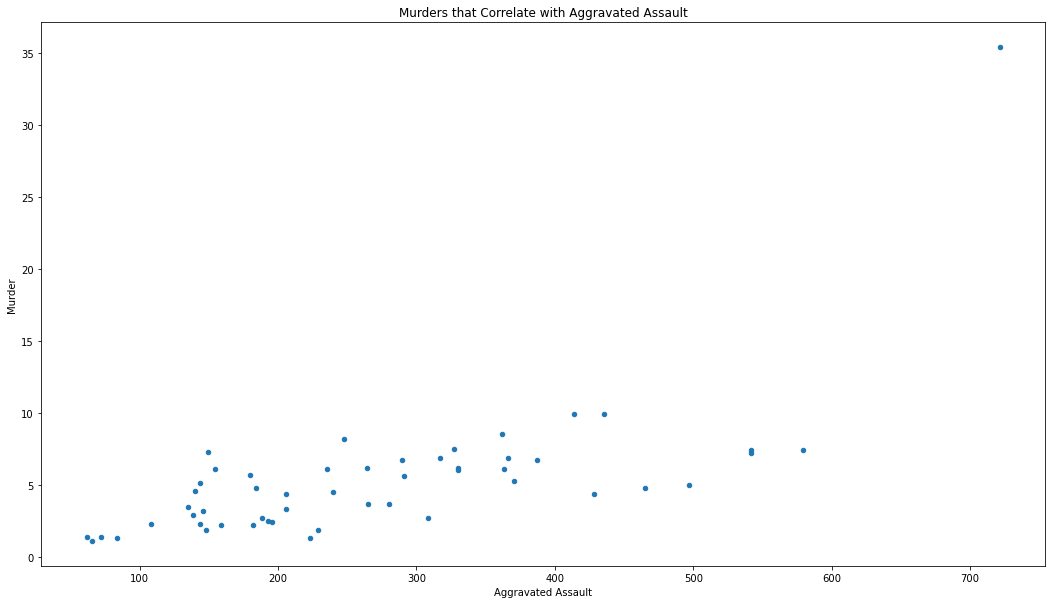

In [483]:
crime_rate_df.plot.scatter(x = 'aggravated_assault', y = "murder", ylabel = "Murder" , xlabel = "Aggravated Assault", title = "Murders that Correlate with Aggravated Assault",figsize = (18,10))

Text(0, 0.5, 'Number of Accounts')

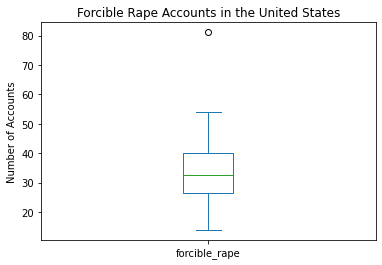

In [484]:
crime_rate_df['forcible_rape'].plot(kind='box')
plt.title("Forcible Rape Accounts in the United States")
plt.ylabel("Number of Accounts")
#plt.xlabel("Forcible Rape")

Text(0.5, 0, 'Number of Aggravated Assaults')

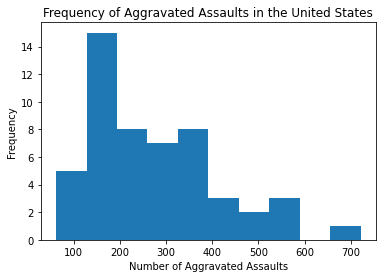

In [485]:
crime_rate_df['aggravated_assault'].plot(kind='hist')
plt.title("Frequency of Aggravated Assaults in the United States")
plt.xlabel("Number of Aggravated Assaults")

In [426]:
sales_df = pd.read_excel("sales.xlsx")
sales_df

,Month,Category,Target,Amount
0,2018-08,Furniture,10900,15259
1,2018-08,Electronics,9000,16740
2,2018-10,Electronics,9000,15537
3,2018-11,Furniture,11300,12465
4,2018-11,Electronics,9000,10531
5,2018-12,Electronics,9000,11915
6,2019-01,Furniture,11500,15944
7,2019-01,Electronics,16000,22637


In [427]:
sales_df = sales_df[sales_df['Month'] == '2019-01']


In [428]:
sales_df

,Month,Category,Target,Amount
6,2019-01,Furniture,11500,15944
7,2019-01,Electronics,16000,22637


In [429]:
sales_df = sales_df.drop("Month", axis=1)


In [430]:
sales_df['Point'] = [13000, 18000]

In [431]:
sales_df 

,Category,Target,Amount,Point
6,Furniture,11500,15944,13000
7,Electronics,16000,22637,18000


In [473]:
#import plotly.figure_factory as ff

In [472]:
#data = pd.read_json('https://cdn.rawgit.com/plotly/datasets/master/BulletData.json')

In [471]:
#data

In [470]:
#fig = ff.create_bullet(
 #data, markers='markers', measures='measures',
 #ranges='ranges', subtitles='subtitle', titles='title',
#)
#fig

Setting Up Data To Fit The Ploty Class Structure

In [452]:
#Taking the values getting the ranges for the bullet chart
#Getting the avarge


#Returns the marker which is used to see where we should be
def getMarker(average, ranges): 
    return int(average + ranges / 2)



#returns the average
def getAverageValue(measure, ranges):
    return int(measure + ranges / 2)




# getting All values into an array

arraySales = []

arrayMarker = []

arrayMeasures = []

npMeasures = np.array([arrayMeasures])


#Getting values to fit the ploty structure
#will need a starting point, average, and range


#Geting all the values for target
for i in range(len(sales_df['Target'])):
    #Getting the index placed 
    idx = 6 + i
    
    #Getting the value of feilds
    measures = sales_df['Target'][idx]
    ranges = sales_df['Amount'][idx]
    
    average = getAverageValue(measures, ranges )
    
    markers = getMarker(average, ranges)
    
    
    
    arrayMeasures.append([measures, ranges])
    
    arraySales.append([measures, average ,ranges])
    
    arrayMarker.append([markers])



In [462]:
#Setting dumby values to be replaced by object
for i in range(len(arrayMeasures)):
    sales_df['Measures'] = arrayMeasures[i]
    sales_df['Ranges'] = arraySales[0][i]
    sales_df['Markers'] = arrayMarker[i][0]
    
    
    

    

In [463]:
sales_df

,Category,Target,Amount,Point,Measures,Ranges,Markers
6,Furniture,11500,15944,13000,16000,19472,38636
7,Electronics,16000,22637,18000,22637,19472,38636


In [464]:
#Replacing fields with object to be replaced with an array of values

for i in range(len(arrayMeasures)):
    idx = 6 + i
    #setting an object place holder
    sales_df.at[idx ,'Measures'] =    sales_df.astype(object)
    sales_df.at[idx ,'Ranges'] =    sales_df.astype(object)
    sales_df.at[idx ,'Markers'] =    sales_df.astype(object)
    
    #setting the Array of values inside the Data frame
    sales_df.at[idx ,'Measures'] = arrayMeasures[i]
    sales_df.at[idx ,'Ranges'] = arraySales[i]
    sales_df.at[idx ,'Markers'] = arrayMarker[i]
    

 
    
    
    
    
    
    
    

In [465]:
#Values in complete structure compelete 
sales_df

,Category,Target,Amount,Point,Measures,Ranges,Markers
6,Furniture,11500,15944,13000,"[11500, 15944]","[11500, 19472, 15944]",[27444]
7,Electronics,16000,22637,18000,"[16000, 22637]","[16000, 27318, 22637]",[38636]


In [466]:
import plotly.figure_factory as ff

In [486]:
fig = ff.create_bullet(
    sales_df, markers='Markers', measures='Measures',
   ranges='Ranges', subtitles='Category', titles='Category',
    title='Products Sold in 2019 Fell Short of Projected Goals'
)
fig